In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

In [2]:
# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant (J·s)
m = 9.10938356e-31    # Mass of electron (kg)
L = 1e-9              # Length of the box (1 nm)

In [3]:
# Discretization
N = 1000              # Number of points
h = L / (N + 1)       # Step size

In [4]:
# Hamiltonian matrix
H = np.zeros((N, N))
for i in range(N):
    if i > 0:
        H[i, i-1] = -1
    H[i, i] = 2
    if i < N-1:
        H[i, i+1] = -1
H *= -hbar**2 / (2 * m * h**2)

In [5]:
# Solve eigenvalue problem
eigenvalues, eigenvectors = eigh(H)

In [6]:
# Convert eigenvalues to energy (in eV)
eigenvalues = eigenvalues / 1.60218e-19  # J to eV conversion

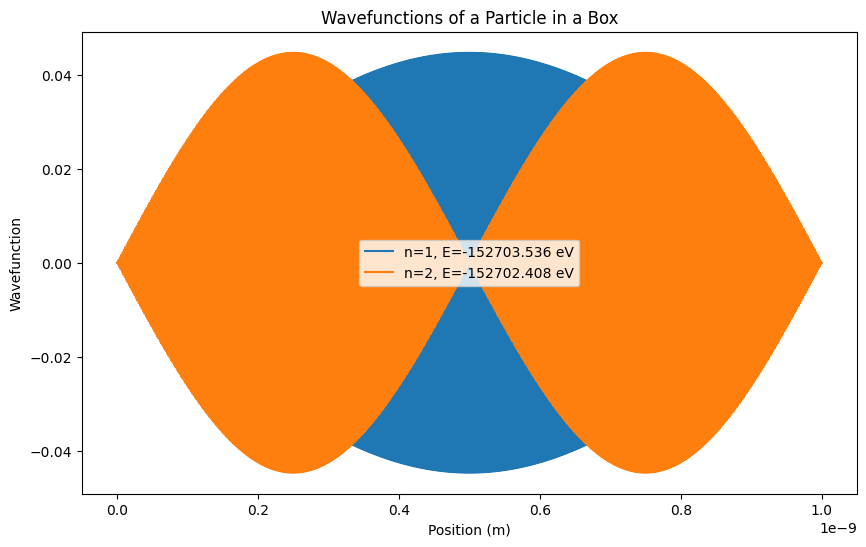

In [14]:
# Plotting the first few eigenfunctions
x = np.linspace(0, L, N+2)
plt.figure(figsize=(10, 6))
for n in range(2):
    psi_n = np.zeros(N+2)
    psi_n[1:N+1] = eigenvectors[:, n]
    plt.plot(x, psi_n, label=f'n={n+1}, E={eigenvalues[n]:.3f} eV')
plt.xlabel('Position (m)')
plt.ylabel('Wavefunction')
plt.title('Wavefunctions of a Particle in a Box')
plt.legend()
plt.show()